In [80]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)
df = pd.read_csv(r'work_from_home_burnout_dataset.csv')
print(df.head())

   user_id day_type  work_hours  screen_time_hours  meetings_count  \
0        1  Weekday        9.59              11.86               4   
1        1  Weekend        7.38              10.33               4   
2        1  Weekend        6.31               8.92               1   
3        1  Weekday        8.34              10.70               4   
4        1  Weekend        6.97               9.83               1   

   breaks_taken  after_hours_work  sleep_hours  task_completion_rate  \
0             2                 0         7.55                  91.2   
1             1                 0         6.69                  82.0   
2             2                 0         8.87                  80.6   
3             1                 1         8.13                  70.0   
4             2                 0         5.85                  67.1   

   burnout_score burnout_risk  
0          19.17          Low  
1          29.70          Low  
2          32.93          Low  
3          45.47  

In [81]:
display(df.head())
display(df.info())

#Conjunto de dados não apresenta valores nulos! Podendo seguir para a próxima etapa da análise.

,user_id,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate,burnout_score,burnout_risk
0,1,Weekday,9.59,11.86,4,2,0,7.55,91.2,19.17,Low
1,1,Weekend,7.38,10.33,4,1,0,6.69,82.0,29.70,Low
2,1,Weekend,6.31,8.92,1,2,0,8.87,80.6,32.93,Low
3,1,Weekday,8.34,10.70,4,1,1,8.13,70.0,45.47,Low
4,1,Weekend,6.97,9.83,1,2,0,5.85,67.1,51.61,Low


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1800 non-null   int64  
 1   day_type              1800 non-null   object 
 2   work_hours            1800 non-null   float64
 3   screen_time_hours     1800 non-null   float64
 4   meetings_count        1800 non-null   int64  
 5   breaks_taken          1800 non-null   int64  
 6   after_hours_work      1800 non-null   int64  
 7   sleep_hours           1800 non-null   float64
 8   task_completion_rate  1800 non-null   float64
 9   burnout_score         1800 non-null   float64
 10  burnout_risk          1800 non-null   object 
dtypes: float64(5), int64(4), object(2)
memory usage: 154.8+ KB


None

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

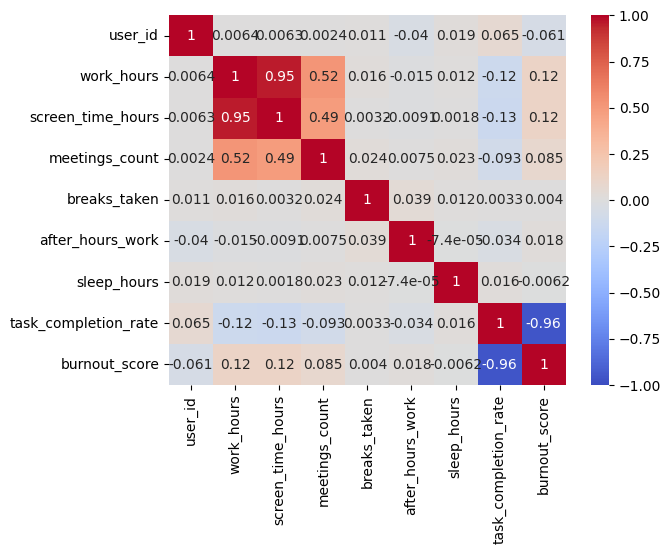

'\nO conjunto de dados demonstra correlação positiva entre risco de burnout com as medidas de horas trabalhadas, tempo de tela e horas de sono que aumentam proporcionalmente ao risco de burnout.\nE correlação negativa com Taxa de completude das tarefas com o risco de burnout.\nPorém é inconclusivo, já que não é possível encontrar uma explicação clara da causalidade entre os dados. Vide maior número de pausas e horas de sono com maior risco de burnout.\n'

In [ ]:
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()
"""
task_completion_rate e burnout_score são relacionados negativamente, enquanto scree_time_hours, meeting_count e work_hours se relacionam positivamente.
"""

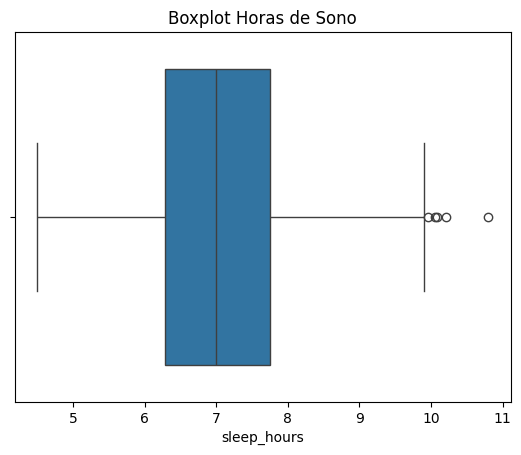

In [84]:
sns.boxplot(x=df['sleep_hours'])
plt.title('Boxplot Horas de Sono')
plt.show()

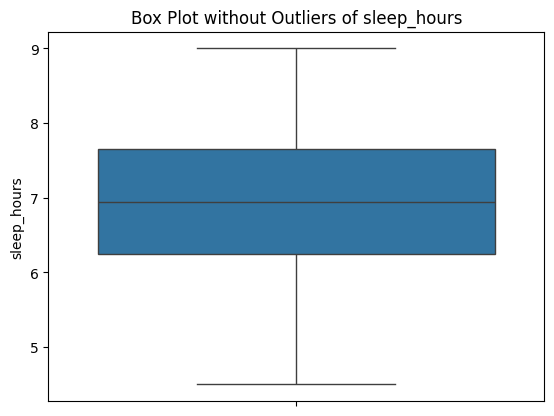

In [85]:
# Tentativa de remoção de Outlier nas horas de sono

def removal_box_plot(df, column, threshold):
    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = 9

no_outliers = removal_box_plot(df, 'sleep_hours', threshold_value)

In [86]:
mediana_hora_trabalho_risco_ = df.groupby('burnout_risk')['sleep_hours'].mean().reset_index()
mediana_hora_trabalho_risco_

,burnout_risk,sleep_hours
0,High,7.26100
1,Low,6.99738
2,Medium,6.97004


In [87]:
mediana_hora_trabalho_risco_ = df.groupby('burnout_risk')['task_completion_rate'].mean().reset_index()
mediana_hora_trabalho_risco_

,burnout_risk,task_completion_rate
0,High,40.000000
1,Low,76.855272
2,Medium,47.420553


In [88]:
relacao_sono_trabalho_ = (
    df
    .groupby('burnout_risk')[['task_completion_rate', 'work_hours', 'screen_time_hours', 'breaks_taken', 'sleep_hours']]
    .mean()
    .reset_index()
)

relacao_sono_trabalho_

,burnout_risk,task_completion_rate,work_hours,screen_time_hours,breaks_taken,sleep_hours
0,High,40.000000,7.612500,10.401500,3.300000,7.26100
1,Low,76.855272,6.464885,9.215272,3.028160,6.99738
2,Medium,47.420553,6.731542,9.520870,3.011858,6.97004


In [89]:
"""
Conclusao: Neste contexto, não foram encontradas fenomenos que pudessem dar uma explicação clara para o motivo de Burnout nos trabalhadores em regime de trabalho remoto.
A medida que melhor explica o comportamento é a Taxa de completuda das tarefas, visto que ela é inversamente proporcional ao risco de burnout.
Segundo o modelo Demanda Recursos do Trabalho (JD-R), desenvolvido por pesquisadores como Arnold Bakker e Evangelia Demerouti, o burnout ocorre quando:
Demandas (volume, complexidade, prazos) > Recursos (tempo, autonomia, suporte, energia).
Quando a taxa de conclusão cai, isso geralmente indica que:
As demandas estão acima da capacidade real.
Ou os recursos disponíveis são insuficientes.
Essa discrepância prolongada ativa um estado de estresse crônico — principal precursor do burnout.
"""

'\nConclusao: Neste contexto, não foram encontradas fenomenos que pudessem dar uma explicação clara para o motivo de Burnout nos trabalhadores em regime de trabalho remoto.\nA medida que melhor explica o comportamento é a Taxa de completuda das tarefas, visto que ela é inversamente proporcional ao risco de burnout.\nSegundo o modelo Demanda Recursos do Trabalho (JD-R), desenvolvido por pesquisadores como Arnold Bakker e Evangelia Demerouti, o burnout ocorre quando:\nDemandas (volume, complexidade, prazos) > Recursos (tempo, autonomia, suporte, energia).\nQuando a taxa de conclusão cai, isso geralmente indica que:\nAs demandas estão acima da capacidade real.\nOu os recursos disponíveis são insuficientes.\nEssa discrepância prolongada ativa um estado de estresse crônico — principal precursor do burnout.\n'